In [66]:
import pandas as pd
# import geopandas
import matplotlib.pyplot as plt
from pylab import *
import pivottablejs as pj
import pandas_profiling as pdf

In [39]:
data = pd.read_csv("./microbiome.csv")

In [40]:
data.shape

(1500, 14)

In [41]:
!ls *.csv #(data)

dates.csv  microbiome.csv


In [10]:
data.to_csv()

',REPOSITORY_ID,ASSAY_TYPE,PLATFORM,COUNTRY,DISEASE,BODY_SITE,INSTRUMENT,LON,LAT,SAMPLE_TYPE,ETHNICITY,URBANIZATION,REGION,TARGET_AMPLICON \n0,PRJEB9853,AMPLICON,ILLUMINA,Malawi,Malnutrition,human_gut_metagenome,Iillumina MiSeq,36.81667,-1.2833299999999999,stool,,,,\n1,PRJEB9853,AMPLICON,ILLUMINA,Malawi,Malnutrition,human_gut_metagenome,Iillumina MiSeq,34.76171,-0.10221000000000001,stool,,,,\n2,PRJEB9853,AMPLICON,ILLUMINA,Malawi,Malnutrition,human_gut_metagenome,Iillumina MiSeq,39.66359,-4.05466,stool,,,,\n3,PRJEB9853,AMPLICON,ILLUMINA,Malawi,Malnutrition,human_gut_metagenome,Iillumina MiSeq,36.06667,-0.28333,stool,,,,\n4,PRJEB9853,AMPLICON,ILLUMINA,Malawi,Malnutrition,human_gut_metagenome,Iillumina MiSeq,32.582190000000004,0.31628,stool,,,,\n5,PRJEB9853,AMPLICON,ILLUMINA,Malawi,Malnutrition,human_gut_metagenome,Iillumina MiSeq,32.45944,0.40444,stool,,,,\n6,PRJEB9853,AMPLICON,ILLUMINA,Malawi,Malnutrition,human_gut_metagenome,Iillumina MiSeq,31.394890000000004,0.5584899999999999,stool,,

In [22]:
rcParams["figure.figsize"] = 16,12

In [30]:
df = pd.DataFrame(
    {
#         'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
#      'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

In [31]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

In [8]:
gdf

,Latitude,Longitude,geometry
0,-34.58,-58.66,POINT (-58.66 -34.58)
1,-15.78,-47.91,POINT (-47.91 -15.78)
2,-33.45,-70.66,POINT (-70.66 -33.45)
3,4.60,-74.08,POINT (-74.08 4.6)
4,10.48,-66.86,POINT (-66.86 10.48)


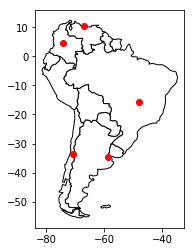

In [32]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
world = world[world.continent == 'South America']
ax = world.plot(column="geometry",color='white', edgecolor='black')

# # We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red')

# plt.show()

In [13]:
df = pd.read_csv("../testdata/Feuil2.csv")#,usecols=['latitude', 'longitude']
df = df.groupby(['latitude', 'longitude']).size().reset_index().rename(columns={0:"count"})

df = df[~pd.isnull(df.latitude) & ~pd.isnull(df.longitude)]
df = df[(df.latitude != "-") & (df.longitude !="-")]
df.latitude = df.latitude.apply(float)
df.longitude = df.longitude.apply(float)
# df = pd.DataFrame(
#     {
# #         'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
# #      'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
#      'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
#      'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

In [47]:
df = pd.read_csv("../testdata/Feuil2.csv")#,usecols=['latitude', 'longitude']
df = df[~pd.isnull(df.latitude) & ~pd.isnull(df.longitude)]
df = df[(df.latitude != "-") & (df.longitude !="-")]
df.latitude = df.latitude.apply(float)
df.longitude = df.longitude.apply(float)
# df = df[df.latitude>0] #.bioproject_name

In [62]:
df = pd.read_csv("/home/devil/Downloads/SraRunTable (7).txt", sep="\t")


In [1]:
# pdf.ProfileReport(df) #.columns # ["SAMPLE NAME"]

In [53]:
df.shape#.drop_duplicates().shape

(1655, 57)

In [68]:
df = pd.read_csv("/home/devil/Downloads/refined_tot_harmonization - Main.csv")

# df = df[["LON LAT"]]
# df = df[~df["LON LAT"].isin(["-","7 9","35 -4", '31 27'])]
# # df = df[df["LON LAT"]!=]
# df["LON"] = df["LON LAT"].apply(lambda x: float(x.split(",")[0]))
# df["LAT"] = df["LON LAT"].apply(lambda x: float(x.split(",")[1]))

In [72]:
x = df[df["REPOSITORY ID"]=="PRJEB5989"].groupby("SAMPLE NAME ").size().reset_index()
x[x[0]!=1]

,SAMPLE NAME,0
33,454reads.lcni5_336_t0_iganeg,2
60,454reads.lcni5_749_t0_all,2
67,454reads.lcni5_775_t0_iganeg,2
68,454reads.lcni5_777_t0_all,2
69,454reads.lcni5_799_t0_iganeg,2
76,454reads.lcni5_819_t0_all,2
91,454reads.malts_k188a_5kw_iganeg,2
97,454reads.malts_k268a_4_iganeg,2
103,454reads.malts_k46a_4rutf_all,2
104,454reads.malts_k46a_4rutf_igapos,2


In [58]:
df[df["REPOSITORY ID"]=="PRJEB5989"].shape

(1096, 26)

In [33]:
df.groupby("REPOSITORY ID")['SAMPLE TYPE'].apply(set)

REPOSITORY ID
PRJEB5989                       {stool}
PRJEB9818                       {stool}
PRJEB9853                       {stool}
PRJNA173810                    {saliva}
PRJNA213674                    {saliva}
PRJNA234437                     {stool}
PRJNA244107                     {stool}
PRJNA247490                    {saliva}
PRJNA253931    {bronchoalveolar_lavage}
PRJNA285808                     {stool}
PRJNA314988                     {stool}
PRJNA343480                    {plasma}
PRJNA356146                     {urine}
PRJNA356629                     {stool}
PRJNA392012                     {stool}
PRJNA392180                     {stool}
mgp12183                        {stool}
mgp7563                         {stool}
mgp83994                        {stool}
Name: SAMPLE TYPE, dtype: object

In [36]:
df.drop_duplicates().shape

(5107, 27)

In [38]:
df.shape[0] - df.drop_duplicates().shape[0]

28

In [17]:

df = df[df["COLLECTION DATE"]!="-"]

df["ALTRED COLLECTION DATE"] = df["COLLECTION DATE"].apply(pd.to_datetime)
df[["ALTRED COLLECTION DATE","COLLECTION DATE"]].to_csv("dates.csv")

In [26]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.LON, df.LAT))

NameError: name 'geopandas' is not defined

In [49]:
gdf

,latitude,longitude,count,geometry
1,-13.254308,34.301525,491,POINT (34.301525 -13.254308)
2,-14.208343,35.325692,458,POINT (35.325692 -14.208343)
3,-14.323327,35.297041,183,POINT (35.297041 -14.323327)
4,-14.496822,35.253047,135,POINT (35.253047 -14.496822)
5,-15.184584,35.379558,42,POINT (35.379558 -15.184584)
6,-15.300000,35.400000,25,POINT (35.4 -15.3)
7,-15.380000,35.300000,53,POINT (35.3 -15.38)
8,-15.559321,35.496030,75,POINT (35.49603 -15.559321)
9,-15.801581,35.015722,978,POINT (35.015722 -15.801581)
10,-16.002000,35.300000,31,POINT (35.3 -16.002)


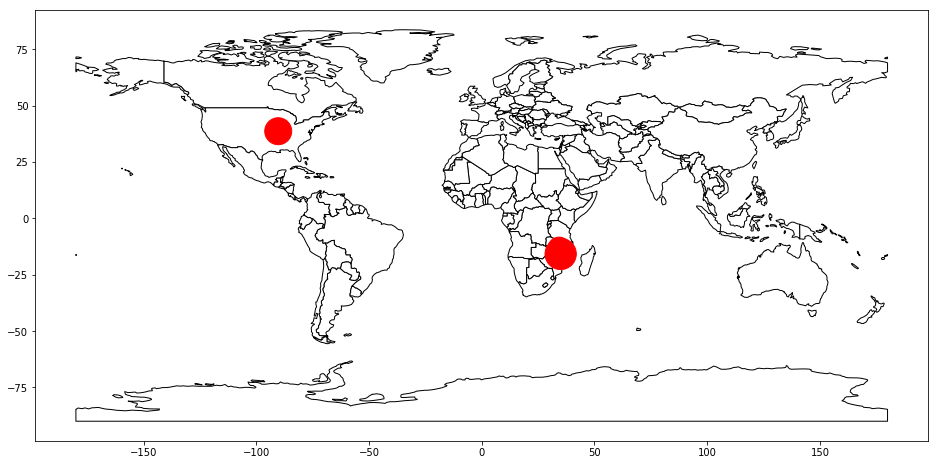

In [23]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
# world = world[world.continent == 'Africa']
ax = world.plot(column="geometry",color='white', edgecolor='black')

# # We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red',markersize="count")

In [120]:
import geopandas
import geoplot

path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)
df = df[df.continent=="Africa"]
df = df.rename(columns={"name":"country"})
df["count"] = 0


In [121]:
df2 = pd.read_csv("../testdata/Feuil2.csv")
df2 = df2[~df2.country.isin({'Africa NA','Africa Na'})]
df2 = df2[~pd.isnull(df2.country)]
df2.country = df2.country.apply(lambda x: x.strip())
df2 = df2.groupby("country").size().reset_index().rename(columns={0:"count"})

In [130]:
df3 = df.merge(df2, on="country", how="outer").fillna(0)

In [131]:
df3 #[['count','geometry']]

,pop_est,continent,country,iso_a3,gdp_md_est,geometry,count
0,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...,486.0
1,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...,0.0
2,83301151,Africa,Dem. Rep. Congo,COD,66010.0,POLYGON ((29.33999759290035 -4.499983412294092...,0.0
3,7531386,Africa,Somalia,SOM,4719.0,"POLYGON ((41.58513 -1.68325, 40.993 -0.85829, ...",0.0
4,47615739,Africa,Kenya,KEN,152700.0,"POLYGON ((39.20222 -4.67677, 37.7669 -3.67712,...",364.0
5,37345935,Africa,Sudan,SDN,176300.0,"POLYGON ((24.56736901215208 8.229187933785468,...",0.0
6,12075985,Africa,Chad,TCD,30590.0,"POLYGON ((23.83766000000014 19.5804700000001, ...",0.0
7,54841552,Africa,South Africa,ZAF,739100.0,"POLYGON ((16.34497684089524 -28.5767050106977,...",174.0
8,1958042,Africa,Lesotho,LSO,6019.0,POLYGON ((28.97826256685724 -28.95559661226171...,0.0
9,13805084,Africa,Zimbabwe,ZWE,28330.0,"POLYGON ((31.19140913262129 -22.2515096981724,...",0.0


In [113]:
type(df3.gdp_md_est[1])

numpy.float64

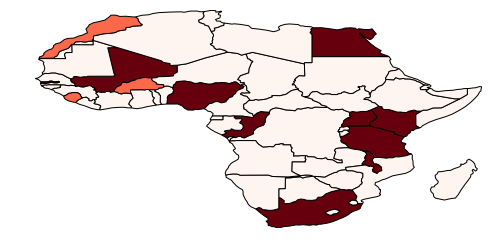

In [135]:
geoplot.choropleth(df3, hue='count', cmap='Reds', figsize=(8, 4))

In [2]:
geoplot.aggplot(collisions, projection=gcrs.AlbersEqualArea(),
                   hue='NUMBER OF PERSONS INJURED', agg=np.max, cmap='Reds',
                   nmin=100, nmax=500,
                   linewidth=0.5, edgecolor='white',
                   ax=axarr[0])
ax1.set_title("No Geometry (Quadtree)")

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997033076265 49.21498078062912,..."
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819135928291 41.30864166926936,..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,(POLYGON ((141.0002104025918 -2.60015105551566...
8,260580739,Asia,Indonesia,IDN,3028000.0,(POLYGON ((141.0002104025918 -2.60015105551566...
9,44293293,South America,Argentina,ARG,879400.0,(POLYGON ((-68.63401022758323 -52.636370458874...
